# WeatherPy

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

In [6]:
city

'robertsport'

In [7]:
temperature = []
humidity = []
cloudiness = []
wind_speed = []
latitude = []
city_list = []

In [8]:
for city in cities:
    base_url = "https://api.openweathermap.org/data/2.5/weather?"
    url = base_url + "&q=" + city + "&units=Imperial"+ "&appid=" + api_key
    weather_response = requests.get(url)
    try:
        weather_json = weather_response.json()
        temperature.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        latitude.append(weather_json['coord']['lat'])
        city_list.append(city)
    except: 
        weather_json = "City not found"
        print(weather_json)
return weather_json

City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found


SyntaxError: 'return' outside function (<ipython-input-8-ec908a5e2165>, line 16)

### Performing API Calls

In [9]:
temperature

[68,
 64.4,
 16.9,
 83.91,
 53.01,
 65.44,
 -38.33,
 81.34,
 75.76,
 -14.33,
 -5.6,
 35.85,
 -16.2,
 -20.63,
 10.83,
 50.99,
 13.48,
 30.29,
 82.11,
 52.9,
 83.53,
 74.84,
 82.2,
 53.2,
 11.08,
 80.35,
 68.25,
 70.86,
 46.98,
 68,
 43.47,
 78.93,
 71.51,
 81.59,
 80.6,
 71.44,
 75.2,
 24.8,
 86.72,
 -18,
 83.35,
 38.26,
 -29.92,
 31.12,
 50.7,
 73.72,
 73.65,
 68.13,
 57.36,
 -29.2,
 26.92,
 68.77,
 64,
 59.7,
 87.8,
 67.06,
 100.4,
 39.15,
 17.74,
 25.07,
 53.01,
 -16.6,
 42.94,
 82.71,
 66.29,
 21.63,
 57.13,
 83.73,
 37.06,
 -24.72,
 29.84,
 80.6,
 54.1,
 -36.94,
 32,
 -10.82,
 47.17,
 58.71,
 79.56,
 9.97,
 34,
 35.67,
 -13,
 75.38,
 60.46,
 29.88,
 82.94,
 79.34,
 73.4,
 80.08,
 83.98,
 59,
 89.89,
 28.18,
 31.03,
 15.8,
 82.4,
 59,
 86,
 38.21,
 66.24,
 -16.6,
 77,
 80.55,
 47.37,
 68,
 74.37,
 85.55,
 84.2,
 -16.6,
 75.45,
 -34.6,
 46.26,
 74.03,
 -40.61,
 67.06,
 39.83,
 25.65,
 7.59,
 89.6,
 28.29,
 81.23,
 58.08,
 84.4,
 84.2,
 86.68,
 66.2,
 52.75,
 77.34,
 62.53,
 66.2,
 21

In [10]:
# Put json data into dictionary/dataframe for HTML conversion

weather_dict = {
    "City": city_list,
    "Temperature": temperature,
    "Humidity": humidity, 
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed, 
    "Latitude": latitude,
}
final_df = pd.DataFrame(weather_dict)
html = final_df.to_html()
print(html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>City</th>
      <th>Temperature</th>
      <th>Humidity</th>
      <th>Cloudiness</th>
      <th>Wind Speed</th>
      <th>Latitude</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>minab</td>
      <td>68.00</td>
      <td>77</td>
      <td>0</td>
      <td>4.70</td>
      <td>27.15</td>
    </tr>
    <tr>
      <th>1</th>
      <td>port elizabeth</td>
      <td>64.40</td>
      <td>88</td>
      <td>90</td>
      <td>10.29</td>
      <td>-33.92</td>
    </tr>
    <tr>
      <th>2</th>
      <td>maniwaki</td>
      <td>16.90</td>
      <td>87</td>
      <td>100</td>
      <td>2.24</td>
      <td>46.38</td>
    </tr>
    <tr>
      <th>3</th>
      <td>lorengau</td>
      <td>83.91</td>
      <td>78</td>
      <td>100</td>
      <td>13.89</td>
      <td>-2.02</td>
    </tr>
    <tr>
      <th>4</th>
      <td>bluff</td>
      <td>53.01</td>
      <td>72</td

In [11]:
final_df.count()

City           592
Temperature    592
Humidity       592
Cloudiness     592
Wind Speed     592
Latitude       592
dtype: int64

In [12]:
lat_values = final_df["Latitude"]
temp_values = final_df["Temperature"]
humid_values = final_df["Humidity"] 
cloud_values = final_df["Cloudiness"]
wind_values = final_df["Wind Speed"]

### Plotting the Data

#### Latitude vs. Temperature Plot

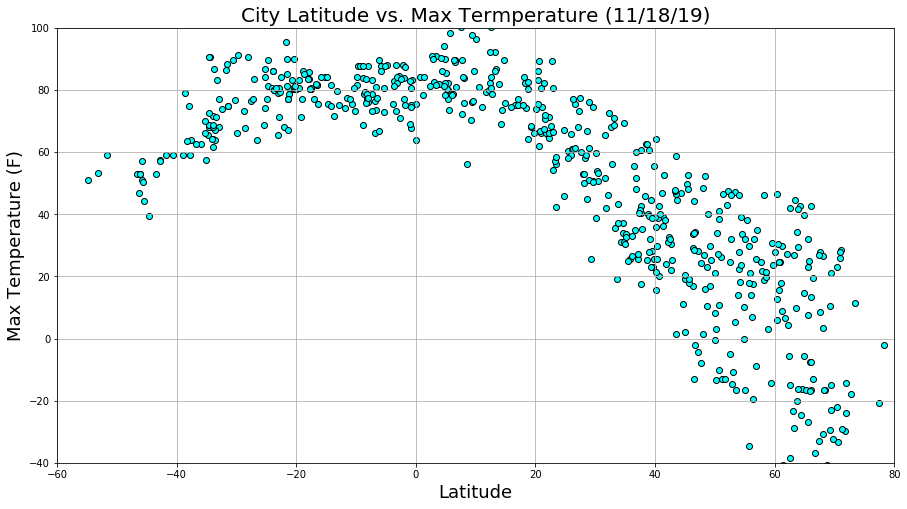

In [13]:
plt.scatter(lat_values, temp_values, c='cyan', edgecolors='black')
plt.title("City Latitude vs. Max Termperature (11/18/19)", fontsize=20)
plt.xlabel("Latitude", fontsize=18)
plt.ylabel("Max Temperature (F)", fontsize=18)
plt.ylim(-40, 100)
plt.xlim(-60, 80)
plt.grid()
plt.gcf().set_size_inches(15, 8)
plt.savefig('lat_temperature.png')

#### Latitude vs. Humidity Plot

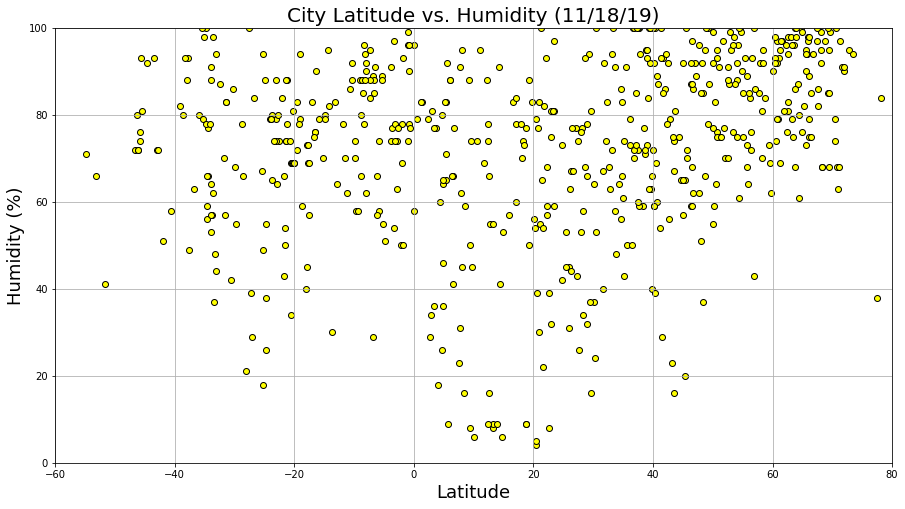

In [21]:
plt.scatter(lat_values, humid_values, c='yellow', edgecolors='black')
plt.title("City Latitude vs. Humidity (11/18/19)", fontsize=20)
plt.xlabel("Latitude", fontsize=18)
plt.ylabel("Humidity (%)", fontsize=18)
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.grid()
plt.gcf().set_size_inches(15, 8)
plt.savefig('lat_humidity.png')

#### Latitude vs. Cloudiness Plot

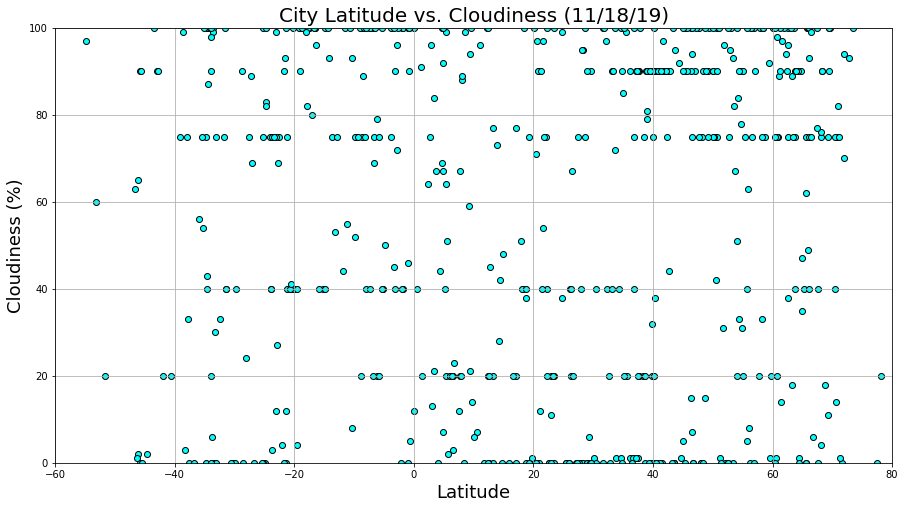

In [23]:
plt.scatter(lat_values, cloud_values, c='cyan', edgecolors='black')
plt.title("City Latitude vs. Cloudiness (11/18/19)", fontsize=20)
plt.xlabel("Latitude", fontsize=18)
plt.ylabel("Cloudiness (%)", fontsize=18)
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.grid()
plt.gcf().set_size_inches(15, 8)
plt.savefig('lat_cloudiness.png')

#### Latitude vs. Wind Speed Plot

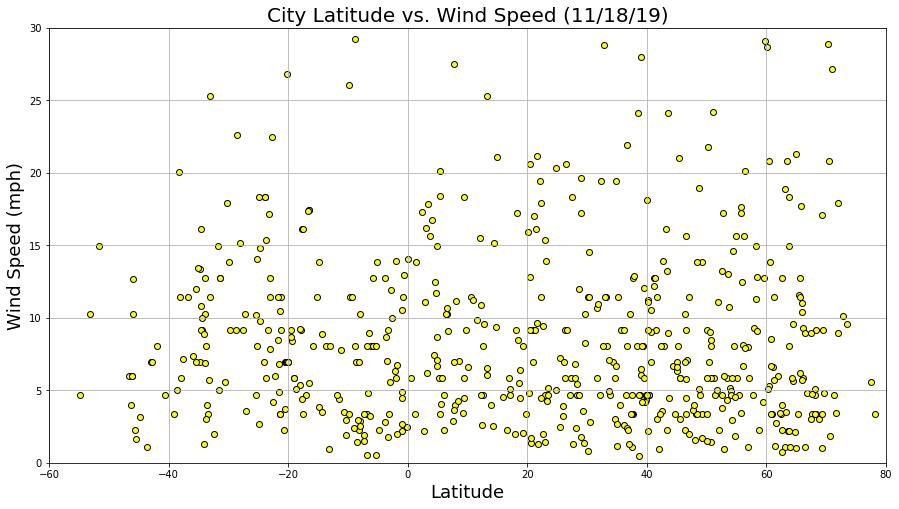

In [22]:
plt.scatter(lat_values, wind_values, c='yellow', edgecolors='black')
plt.title("City Latitude vs. Wind Speed (11/18/19)", fontsize=20)
plt.xlabel("Latitude", fontsize=18)
plt.ylabel("Wind Speed (mph)", fontsize=18)
plt.ylim(0, 30)
plt.xlim(-60, 80)
plt.grid()
plt.gcf().set_size_inches(15, 8)
plt.savefig('lat_wind.png')